# =============================================================

# LOGICRON
## A QUANTUM POWERED LOGISTICS NETWORK GRAPH SOLVER 
### "IS QUANTUM COMPUTING READY FOR AMAZON WEB SERVICES?"
### Ege University | Computer Engineering Department | 2018-2019 Spring Semester | Mobile Cloud Computing
#### Ege Doğan Dursun | Muneeb Alnuaimi | Gamze Karan

# =============================================================

## Step 0: Importing the Necessary Libraries for Graph Generation

In [1]:
#Importing the necessary libraries to generate real-world like graphs.
import networkx as nx
import matplotlib.pyplot as plt
import random

# =============================================================

## Introduction A: Comprehending the Struggle of Travelling Salesman Problem

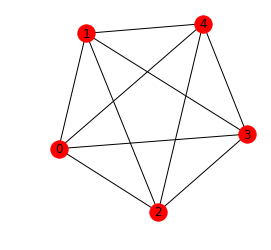

In [2]:
#Travelling Salesman Problem is considered as an NP-Hard problem in Analysis of Algorithms.
#Here we can observe a complete graph with 5 nodes in total. This graph has a complexity of 5! according to algorithm analysis.
#That means that 5! is the approximate number of calculations required to calculate the solution to this graph problem.
#At this moment, it does not seem like a big deal, right?

example_graph_1 = nx.complete_graph(5)
plt.figure(figsize=(3,3))
nx.draw(example_graph_1, with_labels=True, font_weights='bold')

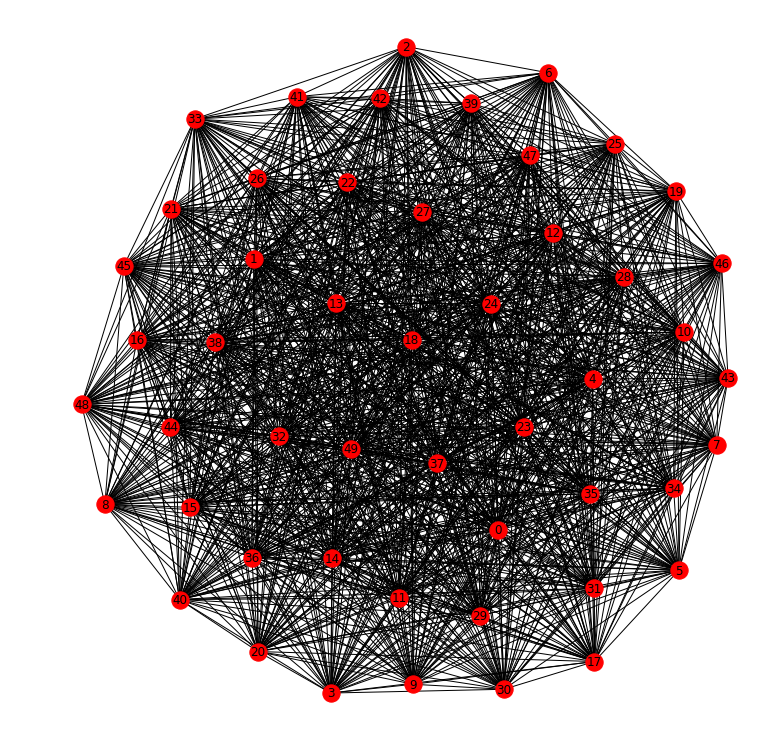

In [3]:
#Now let us consider another graph that contains 50 nodes instead of 5. Now we have a problem with a complexity of 50!
#This graph is basically unsolvable by a normal computer. They lack computational enough computational power.
#Even if they were somehow be able to calculate roughly 50! operations, it would take thousands of years.

example_graph_2 = nx.complete_graph(50)
plt.figure(figsize=(10,10))
nx.draw(example_graph_2, with_labels=True, font_weights='bold')

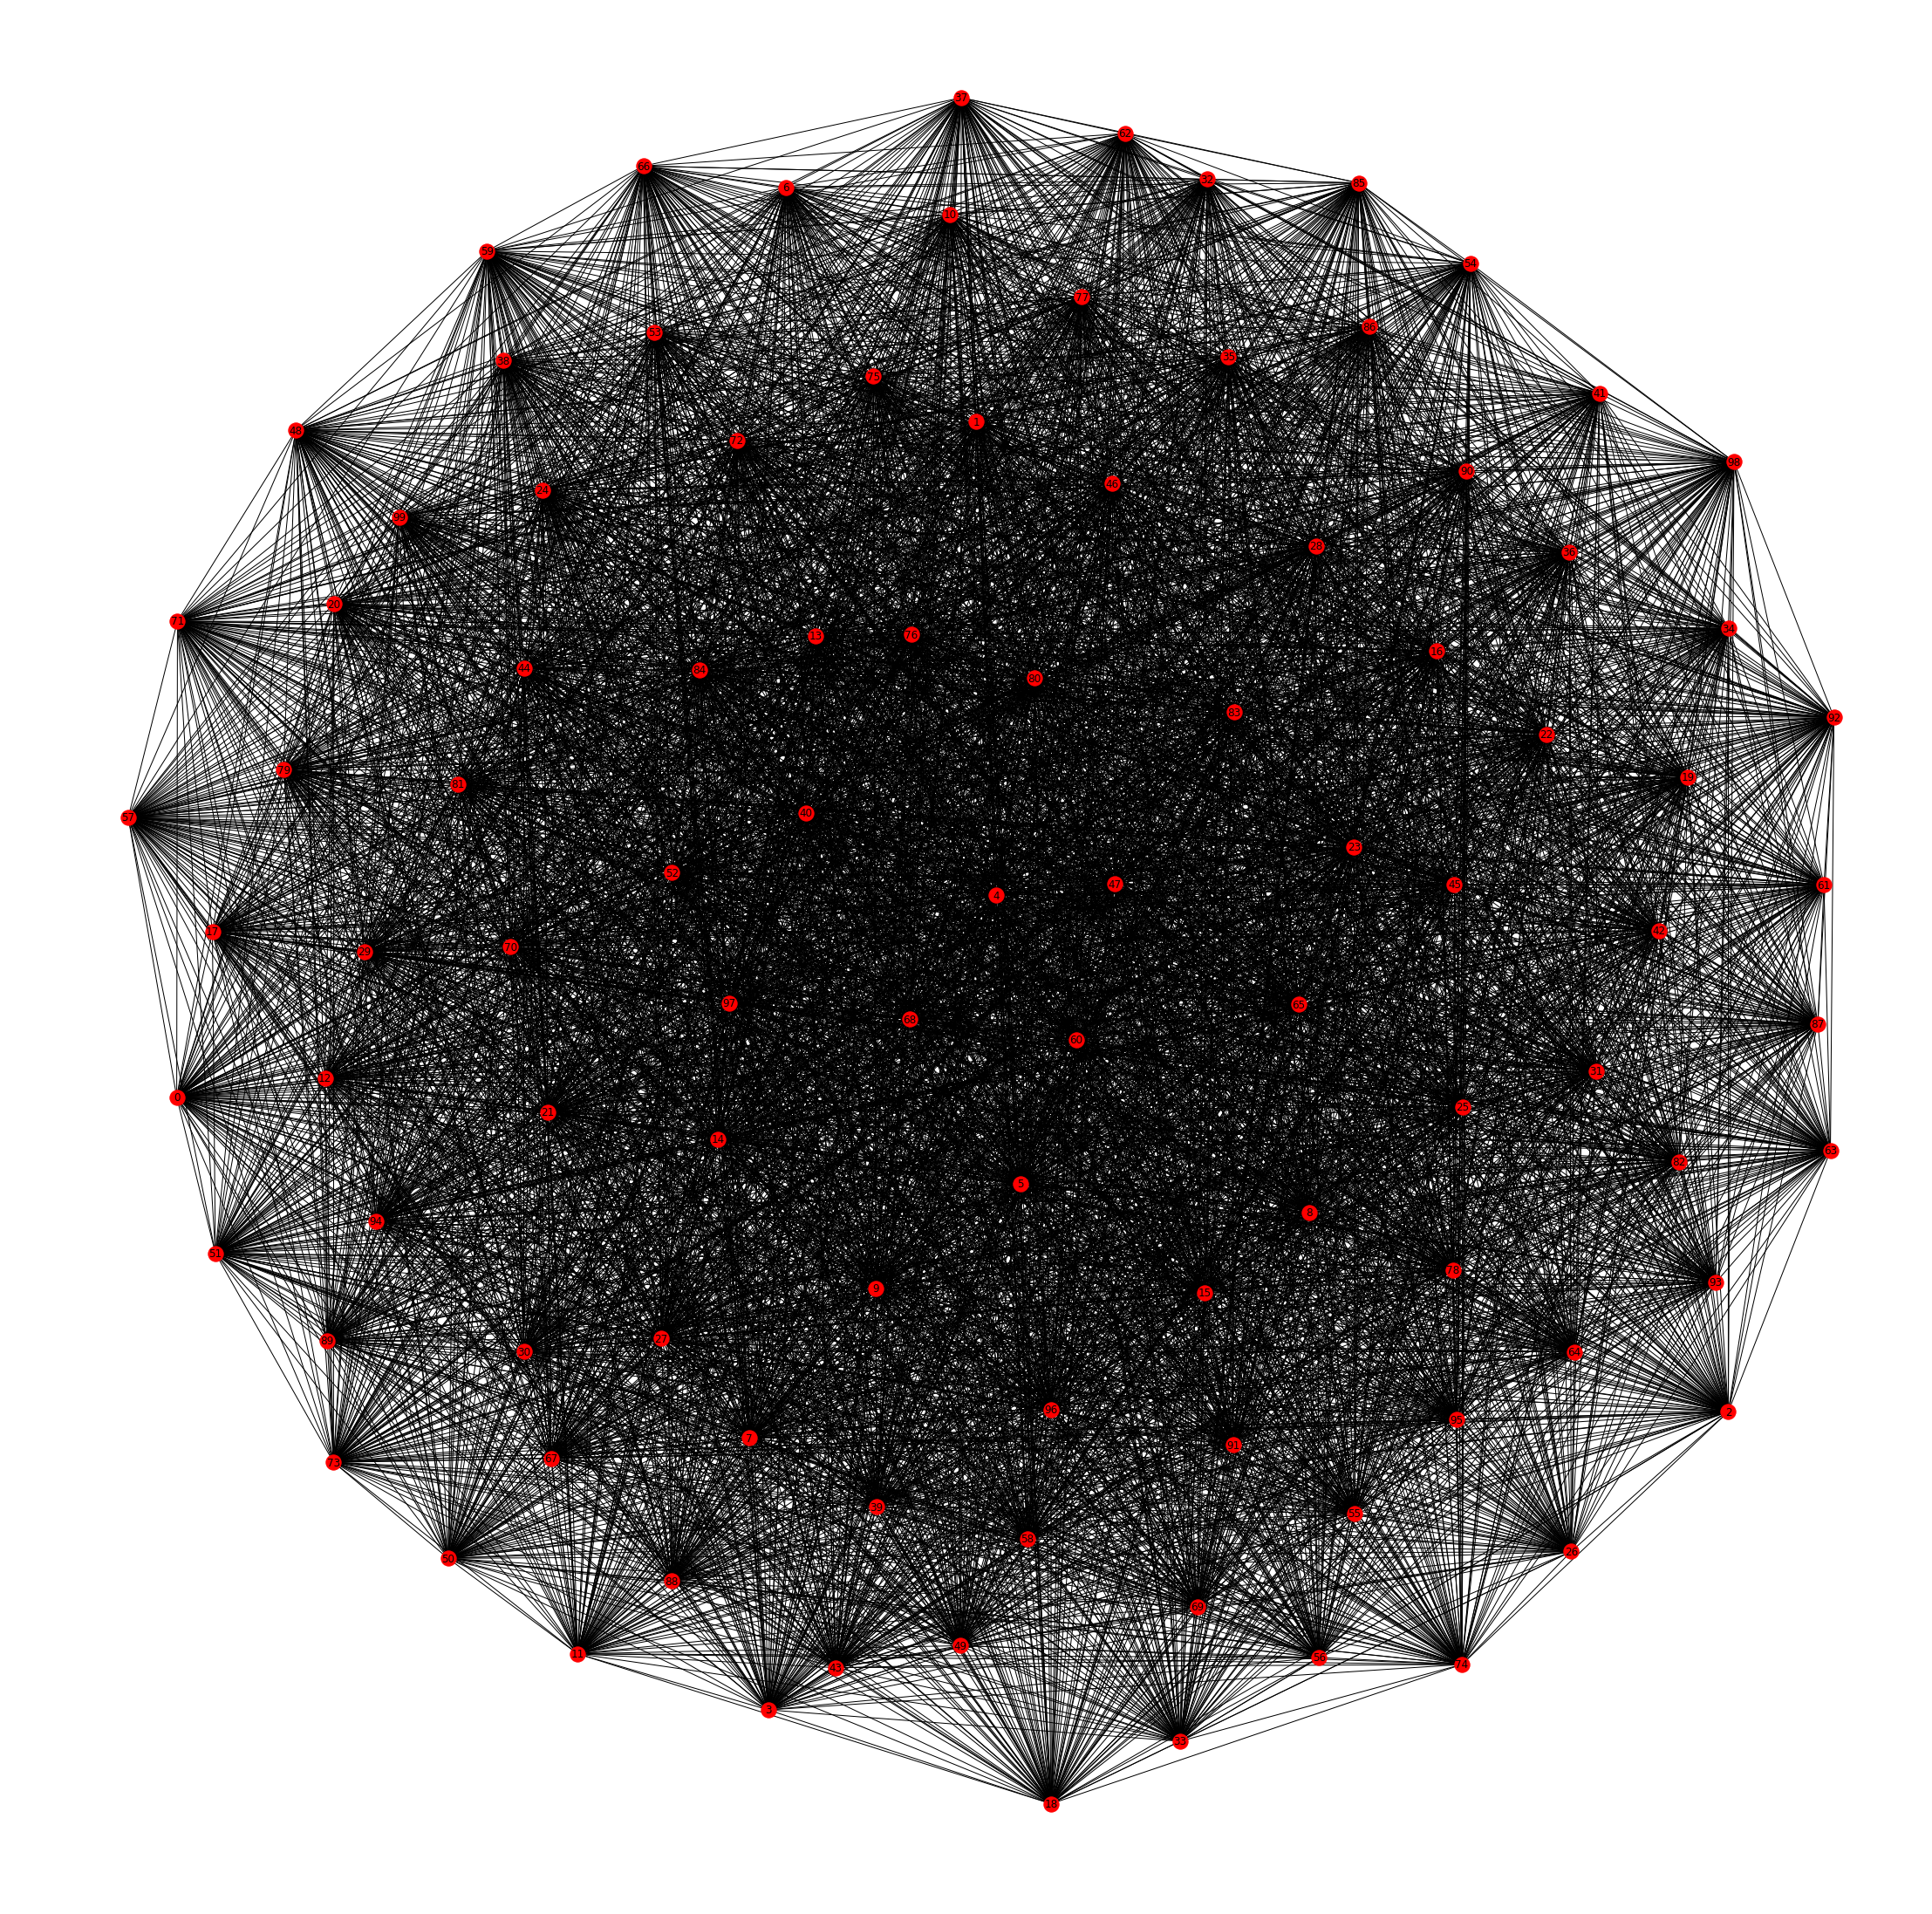

In [4]:
#How about this graph? Now we have a graph with 100 nodes instead of 50. That means a problem complexity of 100!
#As 100! is an enormous number, it is a nobrainer to tell that it is impossible for a normal computer to calculate it's solution
#This is the point that even supercomputers struggle to find a solution to the graph problems in a reasonable time.
#That inefficiency of the standard binary computers are the exact reason Quantum Annealers will rise in the near future.

example_graph_3 = nx.complete_graph(100)
plt.figure(figsize=(30,30))
nx.draw(example_graph_3, with_labels=True, font_weights='bold')

# =============================================================

## Introduction B: Performance Comparison of CPU and QPU

In [4]:
#We determine a value as node count
node_count = 20

#We create an example graph to compare the speeds of calculations by CPU and QPU
race_graph = nx.complete_graph(node_count)

In [5]:
#We import the time library in order to calculate time difference, therefore the spent time
import time

#We import the library that lets the CPU solve the graph problems. 
from dimod.reference.samplers import ExactSolver

#We import the libraries that lets the QPU solve the graph problems. 
from dwave.system.samplers import DWaveSampler
from dwave.system.composites import EmbeddingComposite
import dwave_networkx as dnx

In [6]:
#We create a CPU sampler to assign to our graph problems.
cpu_sampler = ExactSolver()

#We create a QPU sampler to assign to our graph problems.
qpu_sampler = EmbeddingComposite(DWaveSampler())

In [7]:
#Here we start the timer, do the operation and then finally stop the clock to see how much time has passed.
c_start = time.time()

cpu_result = dnx.min_vertex_cover(race_graph, cpu_sampler)

c_end = time.time()

#We receive the spent time of CPU by substracting the starting time from the ending time.
cpu_result_time = (c_end - c_start)

#We print the latency time of CPU in seconds.
print("THE LATENCY OF CPU (IN SECONDS): ", cpu_result_time)

THE LATENCY OF CPU (IN SECONDS):  15.714350938796997


In [10]:
#Here we start the timer, do the operation and then finally stop the clock to see how much time has passed.
q_start = time.time()

qpu_result = dnx.min_vertex_cover(race_graph, qpu_sampler)

q_end = time.time()

#We receive the spent time of QPU by substracting the starting time from the ending time.
qpu_result_time = (q_end - q_start)

#We print the latency time of QPU in seconds.
print("THE LATENCY OF QPU (IN SECONDS): ",qpu_result_time)

THE LATENCY OF QPU (IN SECONDS):  3.3072750568389893


In [11]:
#We print the result of the CPU
print("RESULT OF THE CPU: ",cpu_result)

RESULT OF THE CPU:  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 19]


In [12]:
#We print the result of the QPU
print("RESULT OF THE QPU: ",qpu_result)

RESULT OF THE QPU:  [0, 1, 2, 3, 4, 5, 7, 8, 9, 10, 11, 13, 14, 15, 16, 17, 18, 19]


# =============================================================

##### CPU LATENCY TIME EFFECTIVE FACTORS: 
- CPU FREQUENCY
- CPU CACHE SIZE
- RAM BANDWIDTH AND SIZE
 
Therefore the main factor that is affecting the latency time of the CPU is the hardware structure.
 
 ##### QPU LATENCY TIME EFFECTIVE FACTORS:
- HTTP REQUEST LATENCY
- HTTP RETRIEVING LATENCY
 
Therefore the main factor that is affecting the latency time of the QPU is the internet speed.

# =============================================================
 
 
 | N (node-amount)  |  CPU latency (seconds) | QPU latency (seconds)  |
 |---|---|---|
 | 1   |  0.0  |   2.37    |
 | 2   |  0.49     |  1.92     |
 | 3   |  0.0     |   1.90    |
 | 4   |  0.0     |   1.90    |
 | 5   |  0.0     |  1.91     |
 | 6   |  0.1     |   1.91    |
 | 7   | 0.0      |   1.92    |
 | 8   |  0.0     |   1.95    |
 | 9   |  0.0     |   1.95    |
 | 10  |   0.2    |   2.00    |
 | 11  |  0.3     |   2.12    |
 | 12  |   0.64    |  2.06     |
 | 13  |  0.15     |    2.04   |
 | 14  |  0.26     |   2.08    |
 | 15  |   0.37    |   2.21    |
 | 16  |  0.83     |    2.19   |
 | 17  |   1.91    |   2.19    |
 | 18  |   3.37    |   2.40    |
 | 19  |  7.26     |   2.53    |
 | 20  | 13.8  | 2.42  |
 | 21  | 28.6  | 2.86  |
 | 22  | 56.1  | 2.76  |
 | 23  |   120.4    |   2.32    |
 |  24  |   253.5    |  2.12     |
 |  25   | 508.2      |   2.82    |
 |    26 |   1103.7    |   2.87    |
 |   27  |  2343.2     |  1.92     |

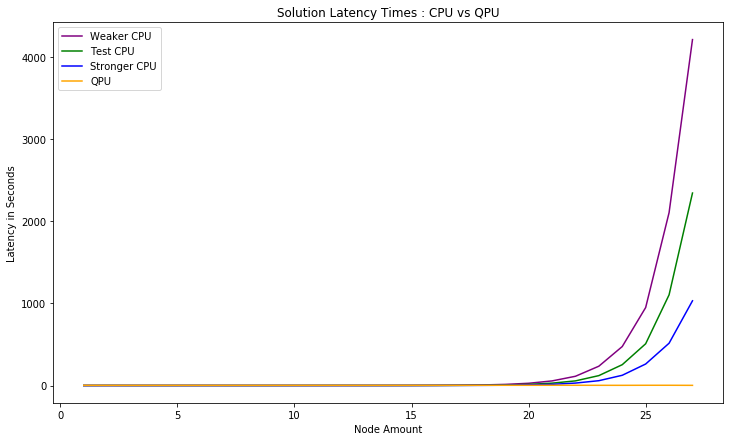

In [14]:
#We followed an experiment by increasing the number of nodes that the graphs contain, starting from 1 and observing until 27.
#It is obvious that classical binary computers have a threshold point that after that point, they immediately start to lose
#efficiency.
#We predicted the changes in the chart considering if we had used a CPU with lower or higher computational power. 
#It seems like increasing the computational power of the binary computers just scroll the exponantial graph of latency
#to the right. There is no way that we can make this exponential graph a bit more linear.


#The number of nodes that we used in experimentation.
dot_amount = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27]

#The predicted latency times for a computer that has a bit weaker CPU than the experiment device.
weaker_cpu_latency = [0.0, 0.0, 0.0, 0.0, 0.0, 0.1, 0.01, 0.00, 0.02, 0.01, 0.05, 0.08, 0.14, 0.32, 0.72, 1.47, 3.12, 6.84, 13.48, 27.11, 55.84,
                     112.27, 234.89, 474.39,  949.23, 2104.35, 4211.43]

#The latency times that have been achieved by the CPU that has been used directly in the experiment.
cpu_latency = [0.0, 0.49, 0.0, 0.0, 0.0, 0.1, 0.0, 0.0, 0.0, 0.2, 0.3, 0.64, 0.15, 0.26, 0.37, 0.83, 1.91, 3.37, 7.26,
              13.8, 28.6, 56.1, 120.4, 253.5, 508.2, 1103.7, 2343.2]

#The predicted latency times that would have been achieved by a device with a CPU a bit superior than the experiment device.
stronger_cpu_latency = [0.0, 0.0, 0.0, 0.01, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0 , 0.0, 0.01, 0.2, 0.11, 0.3, 0.63, 0.88,
                       1.82, 3.39, 8.21, 14.3, 29.54, 58.5, 124.5, 261.7, 514.7, 1031.14]

#The latency times that are achieved by the Quantum Processing Unit.
qpu_latency = [2.37, 1.92, 1.90, 1.90, 1.91, 1.91, 1.92, 1.95, 1.95, 2.00, 2.12, 2.06, 2.04, 2.08, 2.21, 2.19, 2.19,
              2.40, 2.53, 2.42, 2.86, 2.76, 2.32, 2.12, 2.82, 2.87, 1.92]

#Drawing the graph for the experiment results.
plt.figure(figsize=(12,7))
plt.plot(dot_amount, weaker_cpu_latency, color="purple")
plt.plot(dot_amount, cpu_latency, color='g')
plt.plot(dot_amount, stronger_cpu_latency, color="blue")
plt.plot(dot_amount, qpu_latency, color='orange')
plt.xlabel('Node Amount')
plt.ylabel('Latency in Seconds')
plt.title('Solution Latency Times : CPU vs QPU')
plt.legend(['Weaker CPU','Test CPU', 'Stronger CPU', 'QPU'])
plt.show()

# =============================================================

## Introduction C: Accomplishing the Impossible with Quantum Annealer

In [15]:
#We determine a very high value as node count
h_node_count = 50

#We create a graph that contains the determined amount of nodes.
power_graph = nx.complete_graph(h_node_count)

In [16]:
#Here we start the timer, do the operation and then finally stop the clock to see how much time has passed.
q_start = time.time()

qpu_result = dnx.min_vertex_cover(power_graph, qpu_sampler)

q_end = time.time()

#We receive the spent time of QPU by substracting the starting time from the ending time.
qpu_result_time = (q_end - q_start)

#We print the latency time of QPU in seconds.
print("THE LATENCY OF QPU (IN SECONDS): ",qpu_result_time)
print("____________________________________________________")

#We print the result.
print("THE RESULT IS: ", qpu_result)

THE LATENCY OF QPU (IN SECONDS):  9.642757654190063
____________________________________________________
THE RESULT IS:  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 24, 25, 26, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 41, 42, 43, 44, 45, 46, 47, 48, 49]


# =============================================================

## Step 1: Initializing the Conditions We Want to Determine for Generated Graph Problems

In [17]:
#We will assume that we have 10 companies and 50 logistics route graphs for each company.
# "c" variable describes the amount of companies that the database service will contain.
# "g" variable describes the amount of logistics graphs that each company will contain.
# "graphs" is a 2 dimensional array that holds the graphs for each company.
c = 10
g = 10
graphs = [[0 for x in range(g)] for y in range(c)] 

# "min_node_amount" is the minimum of the randomly generated node amount on our graphs.
# "max_node_amount" is the maximum of the randomly generated node amount on our graphs.
min_node_amount = 5
max_node_amount = 15

# "min_min_edge_weight" determines the smallest possible value of randomly generated minimum edge weight
# "max_min_edge_weight" determines the largest possible value of randomly generated minimum edge weight.
min_min_edge_weight = 1
max_min_edge_weight = 10

# "min_max_edge_weight" determines the smallest possible value of randomly generated maximum edge weight.
# "max_max_edge_weight" determines the largest possible value of randomly generated maximum edge weight.
min_max_edge_weight = 100
max_max_edge_weight = 1000

# "f_size" is the predetermined figure size for generated graphs
f_size = 50

# =============================================================

## Step 2: Generating the Trial Graph Problems

In [18]:
#We initiate a for loop to generate random graph problems to be assigned to companies.
# "c_count" variable counts in the outer loop as many as the number of companies.
# "g_count" variable counts in the inner loop as many as the number of graphs per company.
for c_count in range(0,c):
        for g_count in range(0,g):
                
                #We determine randomly generated "node_count", "min_edge_weight" and "max_edge_weight" to 
                #generate very random logistics graphs for the companies.
                node_count = random.randint(min_node_amount,max_node_amount)
                min_edge_weight = random.randint(min_min_edge_weight,max_min_edge_weight)
                max_edge_weight = random.randint(min_max_edge_weight,max_max_edge_weight)
                
                #We create a graph that contains "node_count" amount of nodes.
                cur_graph = nx.complete_graph(node_count)
                
                #We assign weights to the edges of the graphs randomly by obeying the minimum and maximum boundaries that
                #we have initialized before.
                for(u, v) in cur_graph.edges():
                    cur_graph.edges[u,v]['weight'] = random.randint(min_edge_weight, max_edge_weight)
                
                #We put the generated graph to the array we store the graphs
                graphs[c_count][g_count] = cur_graph

# =============================================================

## Step 3: Storing the Generated Graphs in AWS S3 Storage Buckets

In [19]:
#We import boto3 library to be able to use s3 storage that is provided by Amazon Web Services
#We import json library to be able to convert our serialized data to JSON format.
import boto3
import json

#We create an instance to be able to use s3 storage.
s3 = boto3.resource('s3')

#We define the name of the bucket that will be used to store the unsolved graphs that belongs to companies.
input_bucket = "logistics-company-graphs"

#We initiate a for loop to load our graph problems to the relevant s3 storage bucket.
# "c_count" variable counts in the outer loop as many as the number of companies.
# "g_count" variable counts in the inner loop as many as the number of graphs per company.
for c_count in range(0,c):
    
    for g_count in range(0,g):
        
        #In each for loop iteration we define a key for the storage items.
        # "c:" substring defines the id for the company.
        # "g:" substring defines the id for the graph that belongs to company that has the id "c:N"
        key = "graph_instance_"+"c:"+str(c_count)+"_g:"+str(g_count)
        #We serialize the current graph in node-link data format in order to convert it to JSON more easily.
        serialized_data = nx.node_link_data(graphs[c_count][g_count])
        #We convert the serialized graph data into JSON format
        json_data = json.dumps(serialized_data)
        #We save the graph that is in JSON format into the relevant s3 Bucket.
        s3.Bucket(input_bucket).put_object(Key=key, Body=json_data)  

# =============================================================

## Step 4: Retrieving the Graphs from the S3 Buckets

In [20]:
#We import json_graph from networkx.readwrite library to be able to convert our JSON format data to a graph again.
from networkx.readwrite import json_graph

#We define the name of the bucket that will be used to retrieve the graphs that belongs to logistics companies.
bucket_name = 'logistics-company-graphs'

#We define an array to store our received graphs from the relevant bucket.
received_graphs = [[0 for x in range(g)] for y in range(c)] 

#We initiate a for loop to retrieve our graph problems from the relevant s3 storage bucket.
# "c_count" variable counts in the outer loop as many as the number of companies.
# "g_count" variable counts in the inner loop as many as the number of graphs per company.
for c_count in range(0, c):
    
    for g_count in range(0, g):
   
        #In each for loop iteration we indicate the key that belongs to the graph that we would like to retrieve.
        # "c:" substring defines the id for the company.
        # "g:" substring defines the id for the graph that belongs to company that has the id "c:N"
        active_key = "graph_instance_"+"c:"+str(c_count)+"_g:"+str(g_count)
        #We retrieve the current graph in the form of an object first.
        current_object = s3.Object(bucket_name, active_key)
        #We get the serialized graph data inside our current object.
        received_serialized_data = current_object.get()['Body'].read()
        #We convert our serialized graph data into node-link data format again.
        dictionary_result=json.loads(received_serialized_data)
        #We convert our graph that is in node-link data format, to a networkx graph again.
        received_graphs[c_count][g_count] = json_graph.node_link_graph(dictionary_result)

# =============================================================

## Step 5: Solving The Graphs in Quantum Processing Unit (QPU) by D-Wave

In [21]:
#Import the libraries that are necessary to analyze the graphs by using the Quantum Annealer
from dwave.system.samplers import DWaveSampler
from dwave.system.composites import EmbeddingComposite
import dwave_networkx as dnx

#We define our sampler which is using the Quantum Processing Unit (QPU) that is provided by D-Wave.
sampler = EmbeddingComposite(DWaveSampler())

#We define a result set to store the minimum vertex solution sets for each of our graphs. 
results = [[0 for x in range(g)] for y in range(c)] 

#We initiate a for loop to assign the graph solutions to the result set array.
# "c_count" variable counts in the outer loop as many as the number of companies.
# "g_count" variable counts in the inner loop as many as the number of graphs per company.
for c_count in range(0,c):
    for g_count in range(0,g):
        #We send our graph problem to the QPU to be solved.
        results[c_count][g_count] = dnx.min_vertex_cover(received_graphs[c_count][g_count], sampler)
        print("c:",c_count,"_g:",g_count,"_|successfully calculated.")

c: 0 _g: 0 _|successfully calculated.
c: 0 _g: 1 _|successfully calculated.
c: 0 _g: 2 _|successfully calculated.
c: 0 _g: 3 _|successfully calculated.
c: 0 _g: 4 _|successfully calculated.
c: 0 _g: 5 _|successfully calculated.
c: 0 _g: 6 _|successfully calculated.
c: 0 _g: 7 _|successfully calculated.
c: 0 _g: 8 _|successfully calculated.
c: 0 _g: 9 _|successfully calculated.
c: 1 _g: 0 _|successfully calculated.
c: 1 _g: 1 _|successfully calculated.
c: 1 _g: 2 _|successfully calculated.
c: 1 _g: 3 _|successfully calculated.
c: 1 _g: 4 _|successfully calculated.
c: 1 _g: 5 _|successfully calculated.
c: 1 _g: 6 _|successfully calculated.
c: 1 _g: 7 _|successfully calculated.
c: 1 _g: 8 _|successfully calculated.
c: 1 _g: 9 _|successfully calculated.
c: 2 _g: 0 _|successfully calculated.
c: 2 _g: 1 _|successfully calculated.
c: 2 _g: 2 _|successfully calculated.
c: 2 _g: 3 _|successfully calculated.
c: 2 _g: 4 _|successfully calculated.
c: 2 _g: 5 _|successfully calculated.
c: 2 _g: 6 _

# =============================================================

## Step 6: Storing the Graph Results in AWS S3 Buckets

In [22]:
#We define the s3 bucket that we would like to use to store the results that are achieved from the Quantum Annealer Service.
result_bucket = "logistics-company-graphs-results"

#We initiate a for loop to store the graph solutions in the relevant s3 bucket.
# "c_count" variable counts in the outer loop as many as the number of companies.
# "g_count" variable counts in the inner loop as many as the number of graphs per company.
for c_count in range(0,c):
    
    for g_count in range(0,g):
        
        #In each for loop iteration we define the key that will be used to identify; for which graph problem that we created
        #the solution for.
        # "c:" substring defines the id for the company.
        # "g:" substring defines the id for the graph that belongs to company that has the id "c:N"
        key = "result_of_graph_instance_"+"c:"+str(c_count)+"_g:"+str(g_count)
        #We store the current result list into the variable named result_list_data
        result_list_data = results[c_count][g_count]
        #We convert the result list into the JSON format to store it more easily.
        result_json_data = json.dumps(result_list_data)
        #We store the result list that is in JSON format, in the relevant s3 bucket.
        s3.Bucket(result_bucket).put_object(Key=key, Body=result_json_data)  

# =============================================================

## Step 7: Retrieving the Graph Results from S3 Buckets

In [23]:
#We define the bucket name that we would like to receive the result set from.
received_result_bucket_name = 'logistics-company-graphs-results'

#We define the array that we would like to store the results that we have received from the s3 bucket.
received_results = [[0 for x in range(g)] for y in range(c)] 

#We initiate a for loop to receive the graph solutions from the relevant s3 bucket.
# "c_count" variable counts in the outer loop as many as the number of companies.
# "g_count" variable counts in the inner loop as many as the number of graphs per company.
for c_count in range(0, c):
    
    for g_count in range(0, g):
   
        #In each for loop iteration we indicate the key that will be used to identify; for which graph problem that we would
        #like to retrieve the result.
        # "c:" substring defines the id for the company.
        # "g:" substring defines the id for the graph that belongs to company that has the id "c:N"
        active_key = "result_of_graph_instance_"+"c:"+str(c_count)+"_g:"+str(g_count)
        #We store the received result data in the form of an object.
        current_object = s3.Object(received_result_bucket_name, active_key)
        #We store the data of the object as serialized data format.
        received_serialized_result = current_object.get()['Body'].read()
        #We convert the data that is in JSON format to the list data format.
        list_result=json.loads(received_serialized_result)
        #We store the received result in the array that we have created.
        received_results[c_count][g_count] = list_result

# =============================================================

## Step 8: Printing the Result Lists

In [24]:
#We create a for loop to see the solution set that is provided by the Quantum Annealer Service one by one.
for c_count in range(0, c):
    for g_count in range(0, g):
        #Showing the results as output.
        print("-COMPANY NUMBER: ",c_count,"\n-GRAPH NUMBER: ",g_count, "\n-RESULT LIST: ", received_results[c_count][g_count])
        print("_____________________________")

-COMPANY NUMBER:  0 
-GRAPH NUMBER:  0 
-RESULT LIST:  [0, 3, 4, 5, 6, 7, 9, 10, 11]
_____________________________
-COMPANY NUMBER:  0 
-GRAPH NUMBER:  1 
-RESULT LIST:  [1, 2, 3, 5, 6, 11, 12]
_____________________________
-COMPANY NUMBER:  0 
-GRAPH NUMBER:  2 
-RESULT LIST:  [3, 4, 5, 6, 7, 8]
_____________________________
-COMPANY NUMBER:  0 
-GRAPH NUMBER:  3 
-RESULT LIST:  [0, 1, 3, 4, 5, 6, 7]
_____________________________
-COMPANY NUMBER:  0 
-GRAPH NUMBER:  4 
-RESULT LIST:  [0, 1, 2, 3, 4, 5, 6]
_____________________________
-COMPANY NUMBER:  0 
-GRAPH NUMBER:  5 
-RESULT LIST:  [0, 1, 3, 4, 5]
_____________________________
-COMPANY NUMBER:  0 
-GRAPH NUMBER:  6 
-RESULT LIST:  [0, 1, 3, 6, 7, 8, 10]
_____________________________
-COMPANY NUMBER:  0 
-GRAPH NUMBER:  7 
-RESULT LIST:  [0, 1, 2, 4]
_____________________________
-COMPANY NUMBER:  0 
-GRAPH NUMBER:  8 
-RESULT LIST:  [0, 1, 3, 4, 6, 8, 9, 10, 12]
_____________________________
-COMPANY NUMBER:  0 
-GRAPH NUMBER: 


# =============================================================